### 1. 라이브러리 호출하기

In [1]:
import os
import numpy as np
import pandas as pd
import random as rn
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### 2. 파일 불러오기

In [2]:
train = pd.read_csv('../data/petfinder-pawpularity-score/train.csv')
test = pd.read_csv('../data/petfinder-pawpularity-score/test.csv')
submission = pd.read_csv('../data/petfinder-pawpularity-score/sample_submission.csv')

In [5]:
train

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [18]:
test

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1


In [16]:
submission

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,67.75
1,43a2262d7738e3d420d453815151079e,59.15
2,4e429cead1848a298432a0acad014c9d,20.02
3,80bc3ccafcc51b66303c2c263aa38486,94.53
4,8f49844c382931444e68dffbe20228f4,89.82
5,b03f7041962238a7c9d6537e22f9b017,65.50
6,c978013571258ed6d4637f6e8cc9d6a3,71.42
7,e0de453c1bffc20c22b072b34b54e50f,5.85


In [25]:
def check_unique(df_name):
    unique_list = []
    
    for i in df_name.columns:
        unique_list.append(i)
    
#     unique_list.remove("Id")
        
    for j in unique_list:
        print(j,"unique : ", df_name[j].unique())

In [29]:
check_unique(train)
print('--------------------------------------------------------------------------------------------')
check_unique(test)
print('--------------------------------------------------------------------------------------------')

Id unique :  ['0007de18844b0dbbb5e1f607da0606e0' '0009c66b9439883ba2750fb825e1d7db'
 '0013fd999caf9a3efe1352ca1b0d937e' ... 'ffdf2e8673a1da6fb80342fa3b119a20'
 'fff19e2ce11718548fa1c5d039a5192a' 'fff8e47c766799c9e12f3cb3d66ad228']
Subject Focus unique :  [0 1]
Eyes unique :  [1 0]
Face unique :  [1 0]
Near unique :  [1 0]
Action unique :  [0 1]
Accessory unique :  [0 1]
Group unique :  [1 0]
Collage unique :  [0 1]
Human unique :  [0 1]
Occlusion unique :  [0 1]
Info unique :  [0 1]
Blur unique :  [0 1]
Pawpularity unique :  [ 63  42  28  15  72  74  22  35  53  21   2  18  41  13  98  34  69 100
  29  27  50  36  52  40  31  67  54  30  68  24  47  16  95  37  46  62
  25  23  33  32  17  82  55  58  19  26  39  57  38  51  60  49  14  75
  43  88  94  91   4  45   3  89  48  12  20  61  71  97   7  79  11  56
  10  65   8   5  80  59   9  87  44  92   6  73  64  96  83  77  93  78
  84  70  81  66  76  90  85  86   1  99]
--------------------------------------------------------------

### 3. 데이터 전처리

In [21]:
# a = plt.imread('C:/Users/박연재/Desktop/2학기/데이터마이닝/PetFinder/data/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg')
# plt.imshow(a)

In [24]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
Pawpularity      0
dtype: int64

### 4. 조회수 데이터 시각화

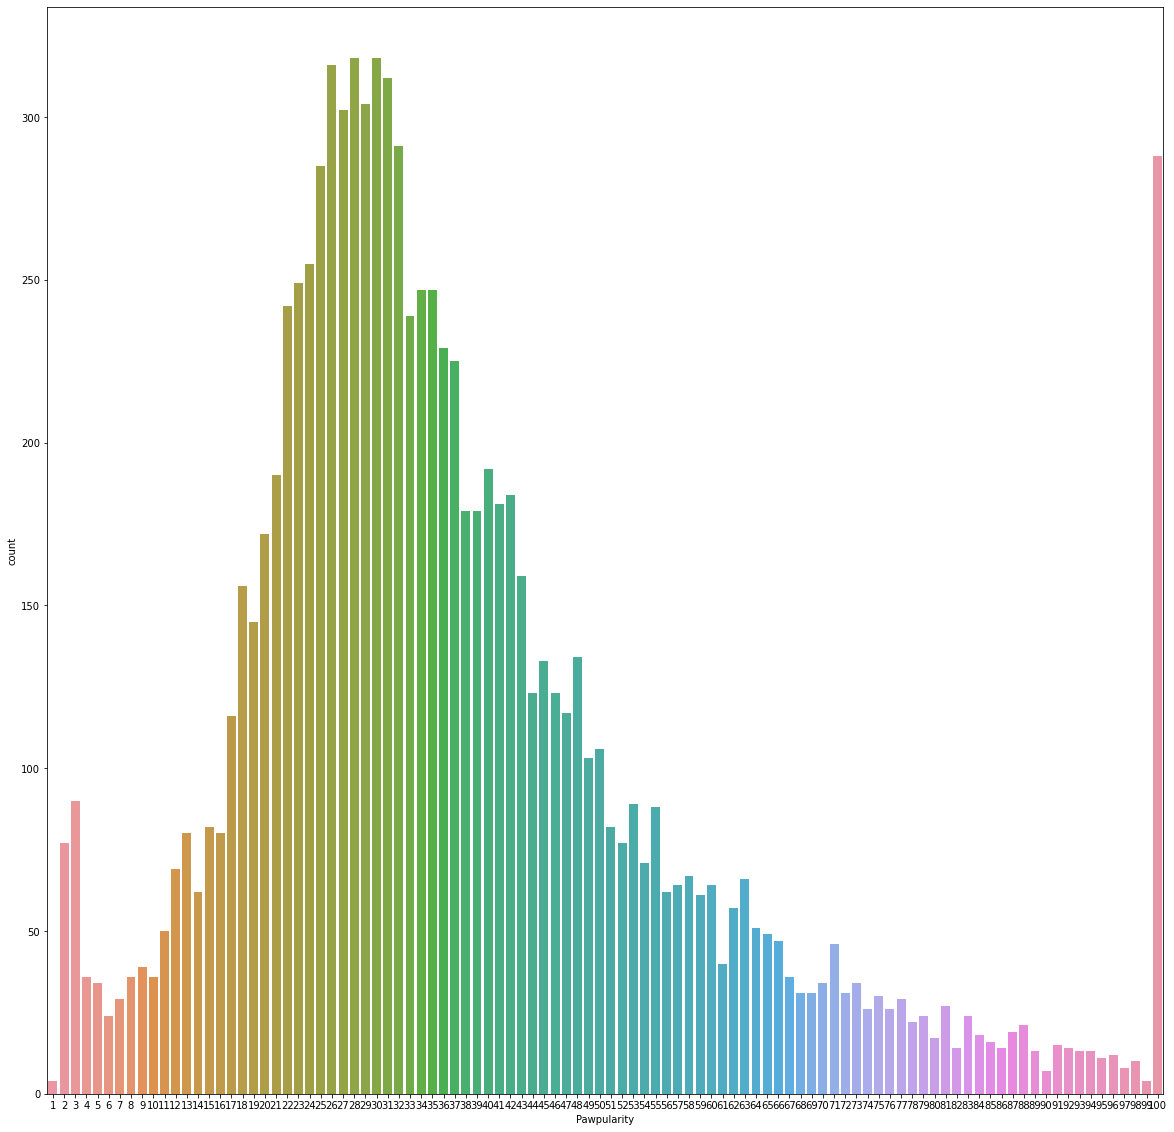

In [3]:
plt.figure(figsize=(20,20))

sns.countplot(x="Pawpularity", data=train)
plt.show()

### 5. action = 1

In [8]:
train.loc[train['Action']==1]['Pawpularity'].unique()

array([ 55,  26,  41,  32,  36,  67,  40,  30,  51,  20,  19,  43,  29,
        17,  18,  44,  25,  69,  34,  12,  16, 100,  39,  37,  96,   4,
        35,  54,  22,  52,  66,  31,  33,  63,  15,  27,  74,  46,  24,
        23,   2,  65,  87,  28,  21,  48,  64,  98,  59,  49,  14,  38],
      dtype=int64)

In [9]:
train.loc[train['Human']==1]['Pawpularity'].unique()

array([ 28,  22,  41,  69,  15,  31,  62,  13,  40,  30,  35,  58,  53,
        23,  57,  38,  34,  14,  19,   4,  45,  39,  36,  48,  18,  29,
        20,  33,  65,  27,  46,  42,  32,  16,  80,  88,  59,   9,  60,
         3,  26,  54,  83, 100,  37,  63,  44,  12,  24,  47,  61,  17,
        21,  72,  70,  79,  51,  52,  49,  77,  66,  25,  71,  10,  50,
        68,  81,  43,   6,   7,   2,  67,  76,  55,  84,  94,  11,  87,
        64,  74,  85,  56,   5,   8,  93,  78,  86,  82,  75,  73,  90,
        91,  95,  98,   1], dtype=int64)

In [17]:
train.loc[train['Near']==0]#['Pawpularity'].unique()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
5,001dd4f6fafb890610b1635f967ea081,0,0,1,0,0,0,0,0,0,0,0,1,74
7,0031d6a9ef7340f898c3e05f92c7bb04,0,1,1,0,0,0,1,1,0,0,1,0,35
14,00655425c10d4c082dd7eeb97fa4fb17,0,1,0,0,0,1,0,0,0,0,0,0,13
17,006fe962f5f7e2c5f527b2e27e28ed6d,0,1,1,0,0,0,0,1,1,1,0,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,fe8502be7330dd591b7349492e594f3e,0,0,0,0,0,0,1,0,0,0,0,0,20
9888,ff1233d348cba9f95ba35679b35e26b6,0,1,1,0,0,0,1,1,0,0,1,0,38
9894,ff5aacc3eeb12cc9c029259d5171a4df,0,1,1,0,0,0,0,1,0,0,1,0,45
9897,ff6591fb1b3481fe0c366dfdcdc8ab5f,0,0,0,0,0,0,0,0,0,0,0,0,30


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
19,00768659c1c90409f81dcdecbd270513,0,1,1,0,0,0,0,0,0,0,0,0,100
50,013f86ed0e765b189990d3d5ac28bd7d,0,0,0,1,0,0,1,0,0,0,0,0,100
86,0254f54b148543442373d5aad45b2d1a,0,1,1,1,0,0,0,0,0,0,0,0,100
182,04fef9f129bc6e4b90644d4290fde8c3,0,1,1,1,0,0,0,0,0,0,0,0,100
227,063d79b149f4d163eae86f777a39a42f,0,0,1,1,0,0,0,0,0,0,0,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,fa27d0eeeec835a00853d382f8777b19,0,1,1,1,0,0,0,0,0,0,0,0,100
9725,fb1b85c23f5cc8a079387ff575b67b50,0,1,1,1,0,0,0,0,0,0,1,0,100
9836,fde75ba22f491d31c9267e59f6cbfe1a,0,1,1,1,0,0,0,0,0,0,0,0,100
9843,fe200aff478f55ca4bcf77d9dade1217,0,1,1,1,0,0,0,0,0,0,0,0,100


In [13]:
# 조회수가 1인 행 출력
train.loc[train['Pawpularity']==1]

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
2442,3ed899a8334a8e5c74f4a554f3ce6f08,0,1,1,1,0,0,0,0,0,0,0,0,1
3232,53b536999aecd800cfda720f3ca363cb,0,1,1,1,0,0,0,0,0,0,0,0,1
4235,6c159aede3df25fdbe781431aabcfc67,0,1,1,1,0,0,0,0,0,0,0,0,1
8674,e0a1efdaf4fbed8659b6d23994ee346e,0,1,1,1,0,0,0,0,1,1,0,0,1


In [15]:
# 조회수가 28인 행 출력
train.loc[train['Pawpularity']==28]

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
10,005017716086b8d5e118dd9fe26459b1,0,1,1,1,0,0,0,0,0,0,0,0,28
22,0084a12f432ef6e47e8b9ff04d8a32b4,0,1,1,1,0,0,0,0,0,0,0,0,28
52,01430d6ae02e79774b651175edd40842,0,1,1,1,0,0,0,1,0,0,1,0,28
57,015ce158a63d5d1e127ecc023648f581,0,1,1,1,0,0,0,0,1,0,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9777,fc41a54a2247d7e4454a3b9534bef214,0,1,1,1,0,0,0,0,1,0,0,0,28
9833,fdce1c6a0a360927ce1b61a2eac56bd8,0,1,1,1,0,0,0,0,0,0,0,0,28
9847,fe375f6618b2ef4c072072563438336d,0,1,1,1,0,1,0,1,0,1,1,0,28
9859,fe61c135cd07dbacec1499d696e6cf3a,0,1,1,1,0,0,0,0,0,0,0,0,28


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
